----
# CNV inference in public scRNA GBM datasets
---
/cluster/projects/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/CNV_public_scRNA/plotting


In [1]:
#options(repos='http://cran.rstudio.com/')
#library(devtools)
#install_github("jokergoo/ComplexHeatmap")
library(ComplexHeatmap)
library(data.table)
library(pheatmap)
library(RColorBrewer)
library(grid)
library(ggplot2)
library(ggExtra)
library(ggpubr)

Loading required package: grid

ComplexHeatmap version 2.5.4
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))



Attaching package: ‘pheatmap’


The following object is masked from ‘package:ComplexHeatmap’:

    pheatmap




---
## 1.0 Plot copy number heatmap 
---


### 1.1 Darmanis et al.


In [10]:
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/CNV_public_scRNA/Darmanis/Cutoff_1/")

In [11]:
cnvs <- readRDS("Darmanis_Ordered_CNV_matrix.rds")
cnv.genes <- readRDS("Darmanis_CNVgenes.rds")
meta <- readRDS("../Darmanis_TumourOnly_meta.rds")

In [60]:
### make row annotations (sample)
annotat.row <- data.frame(colnames(cnvs))
colnames(annotat.row) <- "Cell"
rownames(annotat.row) <- annotat.row$Cell
annotat.row$Cell <- gsub("VIZ.X", "", annotat.row$Cell)
annotat.row$Sample <- NA
annotat.row <- annotat.row[paste0("VIZ.X", meta$SampleName), ]
annotat.row$Sample <- meta$PatientID
annotat.row$Cell <- NULL
dim(annotat.row)
head(annotat.row)

##subset cnvs
cnvs <- cnvs[ ,rownames(annotat.row)]
dim(cnvs)

[1] 1091    1

,Sample
,<chr>
VIZ.X1001000173.G8,BT_S2
VIZ.X1001000173.B4,BT_S2
VIZ.X1001000173.A2,BT_S2
VIZ.X1001000173.E2,BT_S2
VIZ.X1001000173.F6,BT_S2
VIZ.X1001000173.B12,BT_S2


[1] 9907 1091

In [71]:
mat_colors <- list(Chromosome = c(rep(c("lightgrey", "darkgrey"), 11)),
                       Sample = brewer.pal(length(unique(annotat.row$Sample)), "Set3")
                   )

names(mat_colors$Chromosome) <- unique(cnv.genes$Chromosome)
names(mat_colors$Sample) <- unique(annotat.row$Sample)
mat_colors

cols <- c("#67001f",
          "#b2182b",
          "#d6604d",
          "#f4a582",
          "#fddbc7",
          #"#fddbc7",
          "white",
          "white",
          "white",
          "#92c5de",
          "#4393c3",
          "#2166ac",
          "#053061",
          "#053061"
          )
colfunc <- colorRampPalette(cols)
cnv.cols <- colfunc(50)

$Chromosome
          1           2           3           4           5           6 
"lightgrey"  "darkgrey" "lightgrey"  "darkgrey" "lightgrey"  "darkgrey" 
          7           8           9          10          11          12 
"lightgrey"  "darkgrey" "lightgrey"  "darkgrey" "lightgrey"  "darkgrey" 
         13          14          15          16          17          18 
"lightgrey"  "darkgrey" "lightgrey"  "darkgrey" "lightgrey"  "darkgrey" 
         19          20          21          22 
"lightgrey"  "darkgrey" "lightgrey"  "darkgrey" 

$Sample
    BT_S2     BT_S1     BT_S4     BT_S6 
"#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072"

In [72]:
pheatmap(t(cnvs),
         color = rev(cnv.cols),
         cluster_rows = FALSE,
         cluster_cols = FALSE,
         show_colnames = FALSE,
         show_rownames = FALSE,
         annotation_col = cnv.genes,
         annotation_row = annotat.row,
         annotation_colors = mat_colors,
         fontsize_row = 9,
         border_color = "black",
         annotation_legend = TRUE,
         legend = TRUE,
         height = 8,
         width = 15,
         filename = "Darmanis_TumourCNVs.jpeg"
        )

In [75]:
pheatmap(t(cnvs),
         color = rev(cnv.cols),
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         show_colnames = FALSE,
         show_rownames = FALSE,
         treeheight_row = 10,
         annotation_col = cnv.genes,
         annotation_row = annotat.row,
         annotation_colors = mat_colors,
         fontsize_row = 9,
         border_color = "black",
         annotation_legend = TRUE,
         legend = TRUE,
         height = 8,
         width = 17,
         filename = "Darmanis_TumourCNVs_Clustered.jpeg"
        )

### 1.2 Neftel et al.,

In [76]:
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/CNV_public_scRNA/Neftel/Cutoff_1/")

In [77]:
cnvs <- readRDS("Neftel_Ordered_CNV_matrix.rds")
cnv.genes <- readRDS("Neftel_CNVgenes.rds")
meta <- readRDS("../Neftel_TumourOnly_meta.rds")

In [98]:
### make row annotations (sample)
annotat.row <- data.frame(colnames(cnvs))
colnames(annotat.row) <- "Cell"
rownames(annotat.row) <- annotat.row$Cell
annotat.row$Cell <- gsub("VIZ.X", "", annotat.row$Cell)
annotat.row$Sample <- NA
annotat.row <- annotat.row[annotat.row$Cell %in% rownames(meta), ]
annotat.row$Sample <- meta$Sample
annotat.row$Cell <- NULL
head(annotat.row)
dim(annotat.row)

##subset cnvs
cnvs <- cnvs[ ,rownames(annotat.row)]
dim(cnvs)

,Sample
,<chr>
VIZ.X2,MGH100
VIZ.X3,MGH100
VIZ.X4,MGH100
VIZ.X5,MGH100
VIZ.X6,MGH100
VIZ.X7,MGH100


[1] 4916    1

[1] 2554 4916

In [107]:
mat_colors <- list(Chromosome = c(rep(c("lightgrey", "darkgrey"), 11)),
                       Sample = c(brewer.pal(12, "Set3"), brewer.pal(8, "Set2"))
                   )

names(mat_colors$Chromosome) <- unique(cnv.genes$Chromosome)
names(mat_colors$Sample) <- unique(annotat.row$Sample)
mat_colors

cols <- c("#67001f",
          "#b2182b",
          "#d6604d",
          "#f4a582",
          "#fddbc7",
          "#fddbc7",
          #"white",
          "white",
          #"white",
          "#92c5de",
          "#4393c3",
          "#2166ac",
          "#053061",
          "#053061"
          )
colfunc <- colorRampPalette(cols)
cnv.cols <- colfunc(50)

$Chromosome
          1           2           3           4           5           6 
"lightgrey"  "darkgrey" "lightgrey"  "darkgrey" "lightgrey"  "darkgrey" 
          7           8           9          10          11          12 
"lightgrey"  "darkgrey" "lightgrey"  "darkgrey" "lightgrey"  "darkgrey" 
         13          14          15          16          17          18 
"lightgrey"  "darkgrey" "lightgrey"  "darkgrey" "lightgrey"  "darkgrey" 
         19          20          21          22 
"lightgrey"  "darkgrey" "lightgrey"  "darkgrey" 

$Sample
   MGH100    MGH101    MGH102    MGH104    MGH105    MGH106    MGH110    MGH113 
"#8DD3C7" "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" "#B3DE69" "#FCCDE5" 
   MGH115    MGH121    MGH122    MGH124    MGH125    MGH128    MGH129    MGH136 
"#D9D9D9" "#BC80BD" "#CCEBC5" "#FFED6F" "#66C2A5" "#FC8D62" "#8DA0CB" "#E78AC3" 
   MGH143    MGH151    MGH152     MGH66 
"#A6D854" "#FFD92F" "#E5C494" "#B3B3B3"

In [108]:
pheatmap(t(cnvs),
         color = rev(cnv.cols),
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         show_colnames = FALSE,
         show_rownames = FALSE,
         treeheight_row = 10,
         annotation_col = cnv.genes,
         annotation_row = annotat.row,
         annotation_colors = mat_colors,
         fontsize_row = 9,
         border_color = "black",
         annotation_legend = TRUE,
         legend = TRUE,
         height = 8,
         width = 17,
         filename = "Neftel_TumourCNVs_Clustered.jpeg"
        )

In [103]:
pheatmap(t(cnvs),
         color = rev(cnv.cols),
         cluster_rows = TRUE,
         cluster_cols = FALSE,
         show_colnames = FALSE,
         show_rownames = FALSE,
         treeheight_row = 10,
         annotation_col = cnv.genes,
         annotation_row = annotat.row,
         annotation_colors = mat_colors,
         fontsize_row = 9,
         border_color = "black",
         annotation_legend = TRUE,
         legend = TRUE,
         height = 12,
         width = 17,
         filename = "Neftel_TumourCNVs_Clustered_higher.jpeg"
        )

---
## 2.0 Plot Developmental-Injury Response Gradient 
---

In [110]:
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/CNV_public_scRNA/")

In [114]:
darmanis <- readRDS("./Darmanis/Darmanis_AUCell_Scores.rds")
neftel <- readRDS("./Neftel/Neftel_AUCell_Scores.rds")
combo.dat <- readRDS("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/Nuclei_rescore/GSC_GBM_NuclieLive_Meta.rds")

In [121]:
str(darmanis$Developmental_GSC_AUC)

 num [1:1091] 0.1058 0.0863 0.1884 0.1688 0.207 ...


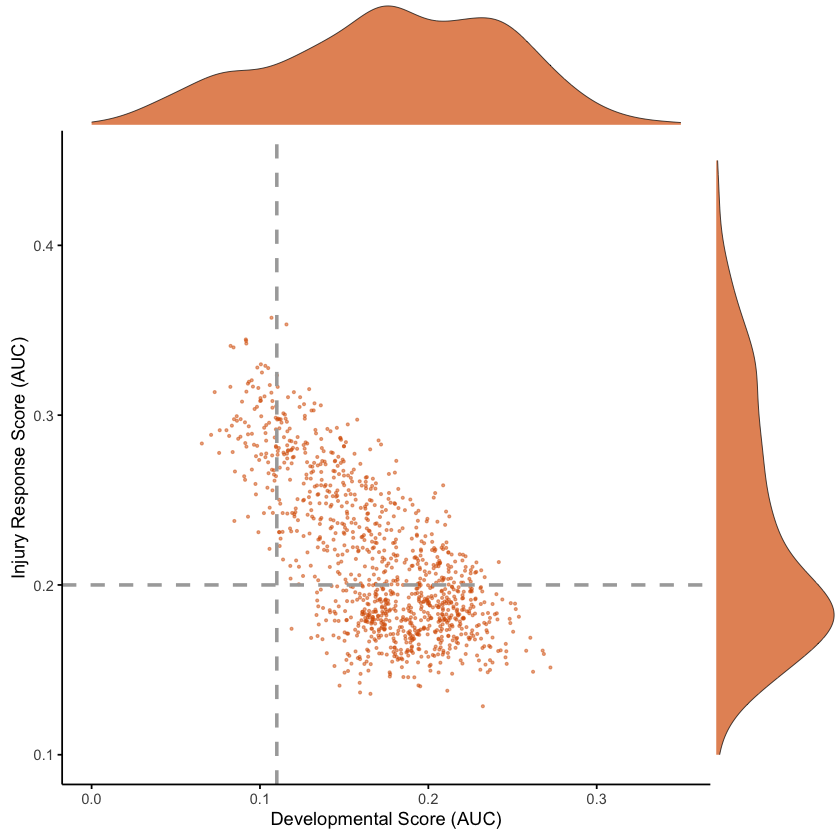

In [169]:
d <- ggscatterhist(darmanis, 
              x = "Developmental_GSC_AUC", 
              y = "InjuryResponse_GSC_AUC",
              #palette = brewer.pal(length(unique(darmanis$PatientID)), "Dark2"), 
              color = brewer.pal(length(unique(darmanis$PatientID)), "Dark2")[2],
              size = 0.5,
              alpha = 0.5,
              xlab = "Developmental Score (AUC)",
              ylab = "Injury Response Score (AUC)",
              #ellipse = TRUE, 
              #ellipse.type = "confidence",
              margin.params = list(fill = brewer.pal(length(unique(darmanis$PatientID)), "Dark2")[2], color = "black", size = 0.2),
              ggtheme = theme_classic(),
              #ellipse.alpha = 0
            ylim = c(0.1,0.45),
              xlim = c(0,0.35),
             print = F
             )  

d$sp <- d$sp +
geom_hline(yintercept = 0.2, linetype = "dashed", lwd = 1, color = "darkgrey") +
geom_vline(xintercept = 0.11, linetype = "dashed", lwd = 1, color = "darkgrey") 
d

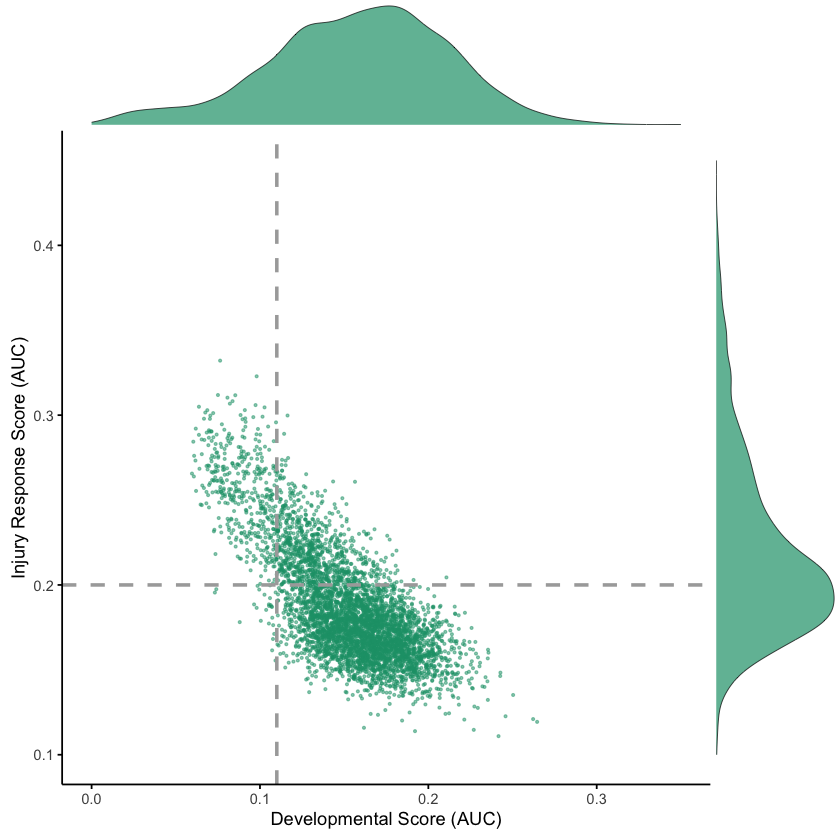

In [168]:
n <- ggscatterhist(neftel, 
              x = "Developmental_GSC_AUC", 
              y = "InjuryResponse_GSC_AUC",
              #palette = brewer.pal(length(unique(darmanis$PatientID)), "Dark2"), 
              color = brewer.pal(length(unique(darmanis$PatientID)), "Dark2")[1],
              size = 0.5,
              alpha = 0.5,
              xlab = "Developmental Score (AUC)",
              ylab = "Injury Response Score (AUC)",
              #ellipse = TRUE, 
              #ellipse.type = "confidence",
              margin.params = list(fill = brewer.pal(length(unique(darmanis$PatientID)), "Dark2")[1], color = "black", size = 0.2),
              ggtheme = theme_classic(),
              #ellipse.alpha = 0
          ylim = c(0.1,0.45),
              xlim = c(0,0.35),
              print = F
             )  

n$sp <- n$sp +
geom_hline(yintercept = 0.2, linetype = "dashed", lwd = 1, color = "darkgrey") +
geom_vline(xintercept = 0.11, linetype = "dashed", lwd = 1, color = "darkgrey") 
n

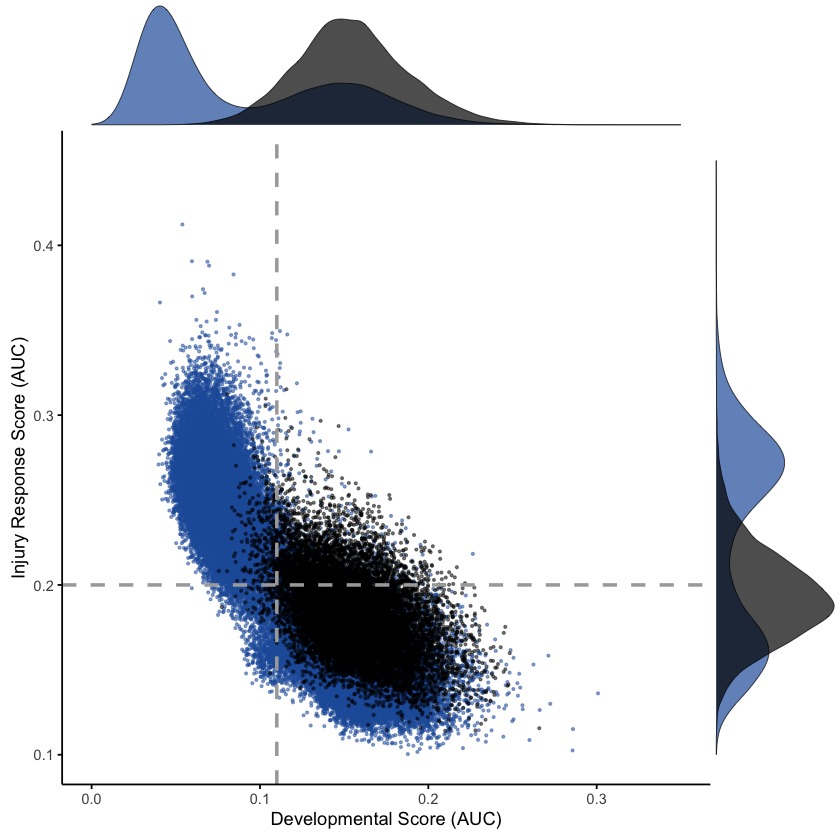

In [171]:
cells <- combo.dat[combo.dat$Technology == "LiveCell", ]
og <- ggscatterhist(cells, 
              x = "Developmental_AUC", 
              y = "InjuryResponse_AUC",
              palette = c("#225ea8", "black", "red"), 
              color = "SampleType",
              size = 0.5,
              alpha = 0.5,
              xlab = "Developmental Score (AUC)",
              ylab = "Injury Response Score (AUC)",
              #ellipse = TRUE, 
              #ellipse.type = "confidence",
              margin.params = list(fill = "SampleType", color = "black", size = 0.2),
              ggtheme = theme_classic(),
              #ellipse.alpha = 0
              ylim = c(0.1,0.45),
              xlim = c(0,0.35),
              print = F,
              legend = "none"
             )  

og$sp <- og$sp +
geom_hline(yintercept = 0.2, linetype = "dashed", lwd = 1, color = "darkgrey") +
geom_vline(xintercept = 0.11, linetype = "dashed", lwd = 1, color = "darkgrey") 
og

In [172]:
pdf("Public_scRNA_Gradient.pdf", width = 5, height = 5)
d
n
og
dev.off()

pdf 
  2

---
## 3.0 Define gain/loss cutoffs
---

https://stackoverflow.com/questions/25264461/find-local-minimum-in-bimodal-distribution-with-r

Neftel: Gain > 0.133, Deletion < -0.109  
Darmanis: Gain > 0.175, Deletion < -0.197


### 3.1 Darmanis


In [48]:
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/CNV_public_scRNA/Darmanis/Cutoff_1/")
cnvs <- readRDS("Darmanis_Ordered_CNV_matrix.rds")
cnv.genes <- readRDS("Darmanis_CNVgenes.rds")

### average inferCNV scores across chromosomes
chr7 <- colMeans(cnvs[rownames(cnv.genes)[cnv.genes$Chromosome == 7], ])
chr10 <- colMeans(cnvs[rownames(cnv.genes)[cnv.genes$Chromosome == 10], ])

pdf("Darmanis_Chr_Cutoffs.pdf", width = 10, height = 4)
par(mfrow=c(1,2))
### plot inferCNV scores on chromosome 7 to define amplification
d <- density(chr7)
hist(chr7, prob=TRUE, ylim=c(0,3), breaks = 50, col = "grey", 
     main = "Average Chromosome 7 Signal\n(Darmanis et al.)",
     xlab = "InferCNV Score"
    )
lines(d, col="red", lty=2, lwd = 2)
v <- optimize(approxfun(d$x,d$y), interval =c(min(chr7),max(chr7)))$minimum
abline(v=v, col="blue", lwd = 3)
v

### plot inferCNV scores on chromosome 10 to define loss threshold
d <- density(chr10)
hist(chr10, prob=TRUE, ylim=c(0,3), breaks = 50, col = "grey", 
     main = "Average Chromosome 10 Signal\n(Darmanis et al.)",
     xlab = "InferCNV Score"
    )
lines(d, col="red", lty=2, lwd = 2)
v <- optimize(approxfun(d$x,d$y), interval =c(-0.6,max(chr10)))$minimum
abline(v=v, col="blue", lwd = 3)
v

dev.off()


[1] 0.1752447

[1] -0.1966744

pdf 
  2

### 3.2 Neftel

In [53]:
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/CNV_public_scRNA/Neftel/Cutoff_1/")
cnvs <- readRDS("Neftel_Ordered_CNV_matrix.rds")
cnv.genes <- readRDS("Neftel_CNVgenes.rds")

### average inferCNV scores across chromosomes
chr7 <- colMeans(cnvs[rownames(cnv.genes)[cnv.genes$Chromosome == 7], ])
chr10 <- colMeans(cnvs[rownames(cnv.genes)[cnv.genes$Chromosome == 10], ])

pdf("Neftel_Chr_Cutoffs.pdf", width = 10, height = 4)
par(mfrow=c(1,2))
### plot inferCNV scores on chromosome 7 to define amplification
d <- density(chr7)
hist(chr7, prob=TRUE, ylim=c(0,4), breaks = 100, col = "grey", 
     main = "Average Chromosome 7 Signal\n(Neftel et al.)",
     xlab = "InferCNV Score"
    )
lines(d, col="red", lty=2, lwd = 2)
v <- optimize(approxfun(d$x,d$y), interval =c(-0.1,0.55))$minimum
abline(v=v, col="blue", lwd = 3)
v

### plot inferCNV scores on chromosome 10 to define loss threshold
d <- density(chr10)
hist(chr10, prob=TRUE, ylim=c(0,6), breaks = 100, col = "grey", 
     main = "Average Chromosome 10 Signal\n(Neftel et al.)",
     xlab = "InferCNV Score"
    )
lines(d, col="red", lty=2, lwd = 2)
v <- optimize(approxfun(d$x,d$y), interval =c(-0.5,0.4))$minimum
abline(v=v, col="blue", lwd = 3)
v

dev.off()

[1] 0.1327258

[1] -0.1086938

pdf 
  2

---
## 4.0 Match genes to chromosome arms
---

In [54]:
### download gene - chr arm position file 
chrarms <- read.table("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/CNV_TCGA/data/chr_arms.txt", header = T)
head(chrarms)

,Idf,Chrom,Start,End,Length
,<fct>,<int>,<int>,<int>,<int>
1,1p,1,0,122026459,122026459
2,1q,1,124932724,248956422,124023698
3,2p,2,0,92188145,92188145
4,2q,2,94090557,242193529,148102972
5,3p,3,0,90772458,90772458
6,3q,3,93655574,198295559,104639985


### 4.1 Darmanis

In [90]:
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/CNV_public_scRNA/Darmanis/Cutoff_1/")

In [91]:
cnv.genes <- readRDS("Darmanis_CNVgenes.rds")

### load start and end positions for all genes
gene.pos <- read.table("~/Desktop/H4H/pughlab/projects/OICR_Brain_NucSeq/GBM/analysis/inferCNV/input/GRCh38-1.2.0_premrna_genomicPositions.txt")
colnames(gene.pos) <- c("Gene", "Chromosome", "Start", "End")
rownames(gene.pos) <- gene.pos$Gene
#head(gene.pos)

### subset to only genes in datasets CNVs
gene.pos <- gene.pos[rownames(cnv.genes), ]
#head(gene.pos)

### match genes to chromsome arm
gene.arm <- c()

for (i in 1:nrow(gene.pos)){

     arm.subset <- chrarms[chrarms$Chrom == gene.pos$Chromosome[i] ,]
     gene.arm[i] <- ifelse(gene.pos$End[i] > arm.subset[1 ,"End"],
           as.character(arm.subset$Idf[2]), #greater than p arm end = q
           as.character(arm.subset$Idf[1]) #NOT greater than p arm end = p
         )
}
gene.pos$arm <- gene.arm
#head(gene.pos)

## save data 
saveRDS(gene.pos, file = "Darmanis_CNVgenes_arm.rds")

In [ ]:
### average cnv signal across chromsome arms








### 4.2 Neftel

In [86]:
setwd("~/Desktop/H4H/pughlab/projects/BTSCs_scRNAseq/Manuscript_G607removed/NatCan_Rebuttal/CNV_public_scRNA/Neftel/Cutoff_1/")

In [87]:
cnv.genes <- readRDS("Neftel_CNVgenes.rds")

### load start and end positions for all genes
gene.pos <- read.table("~/Desktop/H4H/pughlab/projects/OICR_Brain_NucSeq/GBM/analysis/inferCNV/input/GRCh38-1.2.0_premrna_genomicPositions.txt")
colnames(gene.pos) <- c("Gene", "Chromosome", "Start", "End")
rownames(gene.pos) <- gene.pos$Gene
#head(gene.pos)

### subset to only genes in datasets CNVs
gene.pos <- gene.pos[rownames(cnv.genes), ]
#head(gene.pos)

### match genes to chromsome arm
gene.arm <- c()

for (i in 1:nrow(gene.pos)){

     arm.subset <- chrarms[chrarms$Chrom == gene.pos$Chromosome[i] ,]
     gene.arm[i] <- ifelse(gene.pos$End[i] > arm.subset[1 ,"End"],
           as.character(arm.subset$Idf[2]), #greater than p arm end = q
           as.character(arm.subset$Idf[1]) #NOT greater than p arm end = p
         )
}
gene.pos$arm <- gene.arm
#head(gene.pos)

## save data 
saveRDS(gene.pos, file = "Neftel_CNVgenes_arm.rds")

In [88]:
---
## 5. 
---

[1] 2554    5